# Neural Networks for Data Science Applications (2019/2020)
## Final exam

* **Student(s)**: Reza Pourrahim (1859334)
* **Reference paper / topic**: Jaume, Guillaume & Nguyen, An-Phi & Rodriguez Martinez, Maria & Thiran, Jean-Philippe & Gabrani, Maria. (2019). edGNN: a Simple and Powerful GNN for Directed Labeled Graphs. 



# Part 1: Report


**1.   INTRODUCTION**<br/>
<br/>


Graph Neural Network (GNN) is a powerful framework for representation learning of graphs. GNNs employ a neighborhood aggregation design that it aggregates and transforms the representation vectors of the neighboring nodes recursively to compute the representation vector of a node.


In this paper, the authors showed that *edGNN*, the model for directed labeled graphs, that has been built on previous work, is as powerful as the *Weisfeiler–Lehman* algorithm for graph isomorphism.

The paper focuses on extending the theoretical framework presented by *Morris et al. (2018)*, to show that there exist Message Passing Neural Network (MPNN) as powerful as the (one-dimensional) *WL* algorithm for directed graphs with labels for both nodes and edges. <br/>
Furthermore, the paper benchmark their algorithm edGNN on graph and node classification tasks. For graph classification tasks, they used *MUTAG, PTC FM, PTC FR, PTC MM, and PTC MR* dataset and benchmark their edGNN model against the *Subgraph Matching Kernel (CSM) (Kriege & Mutzel (2012)), Weisfeiler–Lehman Shortest Path Kernel (Shervashidze et al.(2011))* and *R-GCN (Schlichtkrull et al. (2018))*. Also, For node classification tasks, they compare their model against *R-GCN (Schlichtkrull et al. (2018)), RDF2Vec (Ristoski & Paulheim (2016))* and *WL (Shervashidze et al. (2011); De Vries & De Rooij
(2015))* on the *AIFB* and *MUTAG* dataset *(Ristoski et al. (2016))*.

In my re-implementation, I've only used the ***MUTAG*** dataset.
<br/>


<br/>**2.   THEORETICAL FRAMEWORK**<br/>
<br/>
***Description of the dataset:***<br/>

  The MUTAG dataset consists of 188 chemical compounds divided into two 
  classes according to their mutagenic effect on a bacterium. 

  The chemical data was obtained form http://cdb.ics.uci.edu and converted 
  to graphs, where vertices represent atoms and edges represent chemical 
  bonds. Explicit hydrogen atoms have been removed and vertices are labeled
  by atom type and edges by bond type (single, double, triple or aromatic).
  Chemical data was processed using the Chemistry Development Kit (v1.4).

<br/>***Methods:***<br/><br/>
**Weisfeiler–Lehman (WL)** test:  is an algorithm to identify if two labeled directed graphs are isomorphic or not. In the *Weisfeiler–Lehman (WL) test*, first, all nodes are assigned a common initial color and labeled with the vertex-labeling function. The algorithm then iteratively recolors a node by aggregating over the multiset of colors in its neighborhood, and the final feature representation of a graph is the histogram of the resulting node colors.

The paper noted that the extension of the WL test to a directed graph with edge labels is straightforward *(Grohe et al. (2017); Orsini et al. (2016))* and its approach is, for each vertex *v*, it is needed to include the in-degrees and out-degrees of *v* separately in the hashing function concerning each edge label, in a recursive step.

As this work is an extension of *Morris et al. (2018)*, we see similar to *Morris et al. (2018)*, they focused on the **graph neural networks (GNN)** model presented by *Hamilton et al. (2017a)*. (In this paper their proposed method: *GraphSAGE*. The key idea behind this method is that learn how to aggregate feature information from a node’s local neighborhood.)

The implementation of this strategy with the node ($v$) update function and node representation or node embedding ($f^{(t)}(v)$) and weights ($W$) is :

\begin{equation}
f^{(t)}(v) = \sigma (f^{(t-1)}(v)W_{1}^{(t)} + \sum_{u\in N(v)} f^{(t-1)}(u)W_{2}^{(t)})
\end{equation}

For the extension of this equation to directed labeled graphs, it is simply needed to expand the equation with embeddings for the labeled edges with incoming and outgoing edges separately:
<br/><br/>

\begin{equation}
f^{(t)}(v) = \sigma (f^{(t-1)}(v)W_{1}^{(t)} + \sum_{u\in N(v)} f^{(t-1)}(u)W_{2}^{(t)} + \sum_{(u,v) \in E} f_{E}(u,v,l_{E}(u,v))W_{3}^{(t)} + \sum_{(v,u) \in E} f_{E}(v,u,l_{E}(v,u))W_{4}^{(t)})
\end{equation}

where $f_{E}(u,v,l_{E}(u,v))$ is embedding of the edge $(v, u)$ with label
$l_{E}(u,v)$.

<br/>

The **graph classification** have implemented by the formulation of node representation $f^{(t)}(v)$ in *Xu et al. (2019)*:

\begin{equation}
f_{G} = Concat(\left \{ \sum_{v \in V_{G}}f^{(t)}(v)\mid t = 0, ... , T  \right \})
\end{equation}

where $f_{G}$ is graph representation.

In **Graph Classification** we have a function called readout. Every graph in the data may have its unique structure, as well as its node and edge features. In order to make a single prediction, one usually aggregates and summarizes over the possibly abundant information. This type of operation is named **readout**.(dgl document) 

<br/>

For the **initialization** of the node and edge features, it has been used the *one-hot encoding* of node and edge input label. Also, for **node classification**, it has been used the in-degree as the input label of the nodes. To model the outgoing edges of the node classification graphs, it has been created new artificial relations by reversing each directed edge. 

<br/>**3.   RESULTS AND CONCLUSION**<br/>
<br/>

Results of the edGNN model graph classification (on the left) and node classification (on the right), with accuracy averaged over ten runs, are presented below. Results are shown as percentages.

As we can see in this table, their model, edGNN, presents comparable performance with the state-of-the-art.
<br/>

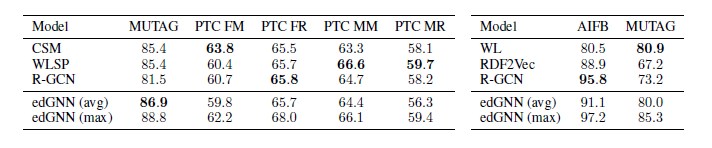


# Part 2: External libraries



I needed to import the **drive** from **googl.colab** to access my drive

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


The variable **sys.path** is a list of strings that determines the interpreter’s search path for modules. I append the folder of drive that I need.

In [ ]:
import sys
# sys.path.append('/drive/My Drive/NNDS')

I used **networkx** to show one graph of the MUTAG dataset, as a sample of all other graphs in the dataset

In [ ]:
! pip install networkx

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

Using Documentation of DGL in https://docs.dgl.ai/index.html:


**Deep Graph Library (DGL)** is a Python package built for easy implementation of graph neural network model family, on top of existing DL frameworks (e.g. PyTorch, MXNet, Gluon etc.).
DGL reduces the implementation of graph neural networks into declaring a set of functions (or modules in PyTorch terminology) <br/>


* **dgl.data** is needed to download *MUTAG* dataset from *TUDataset* for the *Graph Classification*
  * *TUDataset* contains lots of graph kernel datasets for graph classification. Graphs may have node labels, node attributes, edge labels, and edge attributes, varing from different dataset.

* **load_data** is needed to download *MUTAG* dataset for the *Node Classification*

* **DGLGraph** is base graph class. The graph stores nodes, edges and also their features. DGL graph is always directional.


In [ ]:
!pip install dgl-cu101

In [ ]:
# needed for dgl.contrib.data to import load_data
!pip install rdflib

In [ ]:
import dgl
import dgl.data
from dgl.contrib.data import load_data
from dgl import DGLGraph
dgl.__version__

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


'0.5.2'

**Torch** needed libraries. DataLoader is only needed for Graph Classification task.

In [ ]:
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

I needed **KFold** for Graph Classification task.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

**edgnn_layer** is y *EDGNN Message Passing Model* that I've implemented using this link of dgl documentation:

https://docs.dgl.ai/en/0.5.x/guide/message.html

In [ ]:
import edgnn_layer

Function to reset parameters, for reinitialize learnable parameters, in edgnn masseage passing model. using: https://github.com/guillaumejaume/edGNN/blob/master/utils/inits.py

In [ ]:
def reset(nn):
    def _reset(item):
        if hasattr(item, 'reset_parameters'):
            item.reset_parameters()
    if nn is not None:
        if hasattr(nn, 'children') and len(list(nn.children())) > 0:
            for item in nn.children():
                _reset(item)
        else:
            _reset(nn)

# Part 3: Your code


## **Dataset**

### The link to the datasets of the TU Dortmund University

I download and save the "MUTAG" dataset in the directory path using this link: <br/>
[https://ls11-www.cs.tu-dortmund.de/people/morris/graphkerneldatasets/MUTAG.zip](https://ls11-www.cs.tu-dortmund.de/people/morris/graphkerneldatasets/MUTAG.zip)

## **Node Classification**

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


### Creating the Dataset and Graph



**MUTAG Dataset**


Downloading dataset from https://data.dgl.ai/dataset/mutag.tgz...

* Number of nodes:  23644

* Number of relations:  47

* Number of edges:  172098

* Number of classes:  2
  * classes: {0, 1}

* removing nodes that are more than 3 hops away

In [ ]:
# MUTAG dataset for node classification task
mutag_node_cl = load_data(dataset="mutag", bfs_level=3, relabel=False)

labels = torch.squeeze(torch.LongTensor(mutag_node_cl.labels))
num_rels = mutag_node_cl.num_rels
num_classes = mutag_node_cl.num_classes

######################################
# Create Train, Validation, Test set #
######################################

# function for making a Tensor of mask idx
def create_mask(idx, length):
    mask = np.zeros(length, dtype=int)
    mask[idx] = 1
    return torch.ByteTensor(mask)

# 20% validation - 80% Train
# Entity IDs for validation and train set
train_idx, val_idx = np.split(mutag_node_cl.train_idx, [int(0.8*len(mutag_node_cl.train_idx))])
train_mask = create_mask(train_idx, len(labels))
val_mask = create_mask(val_idx, len(labels))

# Entity IDs for test set
test_idx = mutag_node_cl.test_idx
test_mask = create_mask(mutag_node_cl.test_idx, len(labels))

##################################
# Create the graph (a DGL graph) #
##################################

n_nodes = mutag_node_cl.num_nodes
edge_src, edge_dst  = mutag_node_cl.edge_src, mutag_node_cl.edge_dst
edge_type = torch.LongTensor(mutag_node_cl.edge_type)

graph = DGLGraph()
graph.add_nodes(n_nodes)
graph.add_edges(edge_src, edge_dst)
graph.edata['edge_labels'] = edge_type

################################################################################
#In-degree as input label of the nodes. (initialize the node and edge features # 
#with a one-hot encoding of their input label)                                 #
################################################################################
all_node_degree = graph.in_degrees(v='__ALL__')

all_node_degree_list = []
for d in all_node_degree:
  all_node_degree_list.append(d.item())

# instead of each node degree we insert the position id of that node in the a set
# list of all node degrees, by this we have a labeled node degrees
all_node_degree_labeled = []
set_all_node_degree_list = list(set(all_node_degree_list))
for item in all_node_degree_list:
  all_node_degree_labeled.append(set_all_node_degree_list.index(item))

# update our DGL graph with node labels
graph.ndata['node_labels'] = torch.LongTensor(all_node_degree_labeled)
graph.ndata['node_labels'].to(device)

Extracting file to /root/.dgl/mutag
Loading dataset mutag
Graph loaded, frequencies counted.
Number of nodes:  23644
Number of relations:  47
Number of edges:  172098
2 classes: {0, 1}
Loading training set
Loading test set
Number of classes:  2
removing nodes that are more than 3 hops away


/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


tensor([2, 4, 2,  ..., 4, 4, 6], device='cuda:0')

### Model for Node Classification

In [ ]:
# The parameters that I used is exactly what the paper mentioned for the
# best performance

#######################################################################################################
# The node classification experiments were run with a learning rate of 5×10−3 without weight decay.   #
# We used dropout 0.5 on each layer with a ReLu activation. The best performance was achieved by      #
# using 2 layers and 64 hidden units.                                                                 #
#######################################################################################################


parameters_nodcl = {
        "num_hidden_units": 64,
        "dropout": 0.5,
        "num_hidden_layers": 2,
    }


class GNNModel_NodeCL(nn.Module):
  def __init__(self, graph, parameters_nodcl, num_classes, num_rels):
    super(GNNModel_NodeCL, self).__init__()

    self.graph = graph
    self.num_rels = num_rels
    self.parameters_nodcl = parameters_nodcl
    self.num_classes = num_classes

    self.Layer = getattr(edgnn_layer, 'edgnn_MessagePassing_Model')
    self.layers = nn.ModuleList()


    # Edge embeddings
    self.edge_dim = self.num_rels
    self.embed_edges = torch.eye(self.edge_dim, self.edge_dim)
    self.embed_edges.to(device)
    
    # Node embeddings
    n_node_degs = torch.max(self.graph.ndata['node_labels']) + 1
    self.embed_nodes = torch.eye(n_node_degs, n_node_degs)
    self.node_dim = n_node_degs


    # BUILDING EDGNN MODEL LAYERS
    print('\n\n EDGNN Model')
    print('Layer 1 :', self.node_dim, self.edge_dim,
                                  self.parameters_nodcl['num_hidden_units'],
                                  F.relu,
                                  self.parameters_nodcl['dropout'])
    self.layers.append(self.Layer(self.graph, self.node_dim, self.edge_dim,
                                  self.parameters_nodcl['num_hidden_units'],
                                  F.relu,
                                  self.parameters_nodcl['dropout']).to(device))
    
    print('Layer 2 :', self.parameters_nodcl['num_hidden_units'],
                                  self.edge_dim,
                                  self.parameters_nodcl['num_hidden_units'],
                                  F.relu,
                                  self.parameters_nodcl['dropout'])
    self.layers.append(self.Layer(self.graph, self.parameters_nodcl['num_hidden_units'],
                                  self.edge_dim,
                                  parameters_nodcl['num_hidden_units'], F.relu,
                                  parameters_nodcl['dropout']).to(device))
    
    print('Layer 3 :', self.parameters_nodcl['num_hidden_units'], self.edge_dim,
                                  self.num_classes, None,
                                  parameters_nodcl['dropout'])
    self.layers.append(self.Layer(self.graph, self.parameters_nodcl['num_hidden_units'],
                                  self.edge_dim,
                                  self.num_classes, None,
                                  parameters_nodcl['dropout']).to(device))


  def forward(self, graph):
    if graph is not None:
      # Zero feature initializer
      graph.set_n_initializer(dgl.init.zero_initializer)
      graph.set_e_initializer(dgl.init.zero_initializer)
      self.graph = graph

    # building node features
    node_features = self.embed_nodes[self.graph.ndata['node_labels']]
    node_features.to(device)

    # building node features
    edge_features = self.embed_edges[self.graph.edata['edge_labels']]

    # iterate over each layer
    for layer_idx, layer in enumerate(self.layers):
        if layer_idx == 0:
            out = layer(node_features, edge_features, self.graph)
            self.graph.ndata['h_0'] = out
        else:
            out = layer(out, edge_features, self.graph)
            key = 'h_' + str(layer_idx)
            self.graph.ndata[key] = out
            
    return out

In [ ]:
model = GNNModel_NodeCL(graph=graph.to(device),
                        parameters_nodcl=parameters_nodcl,
                        num_classes = num_classes,
                        num_rels=num_rels)



 EDGNN Model
Layer 1 : tensor(166, device='cuda:0') 47 64 <function relu at 0x7faa695aed08> 0.5
Layer 2 : 64 47 64 <function relu at 0x7faa695aed08> 0.5
Layer 3 : 64 47 2 None 0.5


### Train the Model for Node Classification

In [ ]:
###############################################################################
# The maximum number of epochs was set to 400 with early stopping             #
# with respect to the validation set cross-entropy loss (EDGNN: A SIMPLE AND  # 
# POWERFUL GNN FOR DIRECTED LABELED GRAPHS)                                   #
###############################################################################

epoch = 400
learning_rate = 5e-3
batch_norm = False
loss_fcn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),
                                lr=learning_rate)
model.to(device)

GNNModel_NodeCL(
  (layers): ModuleList(
    (0): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=379, out_features=64, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (1): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=175, out_features=64, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (2): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=175, out_features=2, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
  )
)

In [ ]:
# using https://docs.dgl.ai/en/0.5.x/guide/training-node.html#
# define a function to evaluate the Node Classification task.
def evaluate_NodeCL(labels, mask):
    model.eval()
    loss_fcn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        logits = model(None)
        logits = logits[mask]
        labels = labels[mask]
        loss = loss_fcn(logits, labels)
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels), loss


# Early Stopping to avoid overfitting
class EarlyStopping:

  # patience for the maximum number of epoch to wait if our accuray does not improve!
  def __init__(self, patience=10):
    self.patience = patience
    self.counter = 0
    self.best_validation_accuracy = None
    self.early_stop = False
    self.validation_accuracy = -np.Inf

  def __call__(self, epoch_accuracy, model, model_path):

    acc = np.copy(epoch_accuracy)
    if self.best_validation_accuracy is None:
      self.best_validation_accuracy = acc
      self.save_checkpoint(epoch_accuracy, model, model_path)


    # if our accuray did not improve!
    elif acc < self.best_validation_accuracy:
      self.counter += 1
      print('EarlyStopping counter: {} out of {}'.format(self.counter, self.patience))
      if self.counter >= self.patience:
          self.early_stop = True
      return False


    # if our accuray improved! we save the model!
    else:
      self.best_validation_accuracy = acc
      self.save_checkpoint(epoch_accuracy, model, model_path)
      self.counter = 0
    return True

  # save function
  def save_checkpoint(self, epoch_accuracy, model, model_path):
    if epoch_accuracy not in [-np.inf, np.inf, -np.nan, np.nan]:
      print('Validation accuracy improved ({} --> {}).'.format(self.validation_accuracy, epoch_accuracy))
      print('saving the model.')
      torch.save(model.state_dict(), model_path)
    self.validation_accuracy = epoch_accuracy


  def reset(self):
    self.counter = 0
    self.best_validation_accuracy = None
    self.early_stop = False
    self.validation_accuracy = -np.Inf

In [ ]:
es = EarlyStopping(patience=100)
loss_train = []
loss_val = []
accuracy_val = []


for epoch_number in range(epoch):
    model.train()
    
    # forward
    logits = model(None)
    loss = loss_fcn(logits[train_mask.to(device)], labels.to(device)[train_mask.to(device)])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # evaluate the Node Classification on validation dataset
    validation_accuracy, validation_loss = evaluate_NodeCL(labels.to(device), val_mask.to(device))
    validation_accuracy_percent = 100 * validation_accuracy


    # for plot
    loss_train.append(loss)
    loss_val.append(validation_loss)
    accuracy_val.append(validation_accuracy_percent)


    print("Epoch [{}/{}] , Train loss is: {:.4f} , Validataion accuracy is: {:.4f} , Validataion loss is: {:.4f}"
            .format(epoch_number+1, epoch, loss.item(), validation_accuracy_percent, validation_loss))
    
    es(validation_accuracy_percent, model, 'pytorch_model.bin')   
    if es.early_stop:
        print("Early Stopping!!")             
        break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
  if __name__ == '__main__':


Epoch [1/400] , Train loss is: 7209.0391 , Validataion accuracy is: 74.5455 , Validataion loss is: 4178.8203
Validation accuracy improved (-inf --> 74.54545454545455).
saving the model.
Epoch [2/400] , Train loss is: 3711.0112 , Validataion accuracy is: 74.5455 , Validataion loss is: 3174.3831
Validation accuracy improved (74.54545454545455 --> 74.54545454545455).
saving the model.
Epoch [3/400] , Train loss is: 2174.1968 , Validataion accuracy is: 74.5455 , Validataion loss is: 2511.5718
Validation accuracy improved (74.54545454545455 --> 74.54545454545455).
saving the model.
Epoch [4/400] , Train loss is: 2485.0850 , Validataion accuracy is: 74.5455 , Validataion loss is: 2631.5571
Validation accuracy improved (74.54545454545455 --> 74.54545454545455).
saving the model.
Epoch [5/400] , Train loss is: 3655.4626 , Validataion accuracy is: 74.5455 , Validataion loss is: 964.5615
Validation accuracy improved (74.54545454545455 --> 74.54545454545455).
saving the model.
Epoch [6/400] , Tra

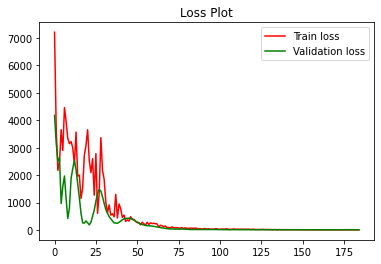

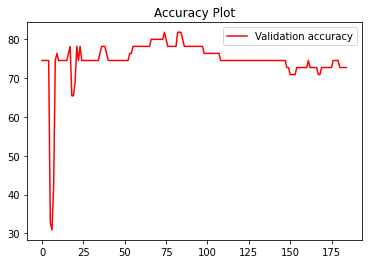

In [ ]:
model.eval()

plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Validation loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Validation accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

### Test the Trained-Model for Node Classification

In [ ]:
# load trained model

model.load_state_dict(torch.load(f"pytorch_model.bin"))
model.eval()

GNNModel_NodeCL(
  (layers): ModuleList(
    (0): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=379, out_features=64, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (1): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=175, out_features=64, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (2): edgnn_MessagePassing_Model(
      (linear): Linear(in_features=175, out_features=2, bias=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
  )
)

In [ ]:
test_accuracy, _ = evaluate_NodeCL(labels.to(device), test_mask.to(device))
print('Test Accuracy is: {} % \n\n\n\n'.format(test_accuracy*100))

Test Accuracy is: 72.05882352941177 % 






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
  if __name__ == '__main__':


---
---
---
## **Graph Classification**


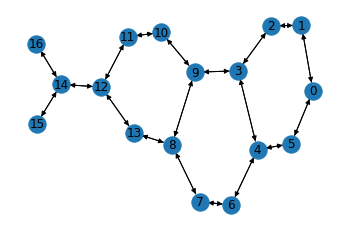

In [ ]:
mutag_graph_cl = dgl.data.TUDataset(name='MUTAG')
# draw first graph
graph_draw, label_draw = mutag_graph_cl[0]
fig, ax = plt.subplots()
nx.draw(graph_draw.to_networkx(), ax=ax,with_labels=True)
plt.show()

In [ ]:
# 188 graph
all_graphs = mutag_graph_cl.graph_lists
# labels of 188 graphs
graph_labels = mutag_graph_cl.graph_labels 
# graph label set : 0 and 1
graph_label_classes = mutag_graph_cl.graph_labels.unique()
# number of class labels
graph_num_classes = mutag_graph_cl.num_labels[0]
# the node number of graph with maximum number of nodes
max_num_node = mutag_graph_cl.max_num_node

In [ ]:
output = []
for g in all_graphs:
  tensor = g.ndata['node_labels']
  output.append(tensor)
all_node_labels = torch.cat(output, dim=0)
print('unique node labels are :', all_node_labels.unique())

# number of unique node labels 
graph_num_entities = len(all_node_labels.unique())

unique node labels are : tensor([0, 1, 2, 3, 4, 5, 6])


In [ ]:
output_e = []
for g in all_graphs:
  tensor = g.edata['edge_labels']
  output_e.append(tensor)
all_edge_labels = torch.cat(output_e, dim=0)
print('unique edge labels are :', all_edge_labels.unique())

# number of unique edge labels 
graph_num_rels = len(all_edge_labels.unique())

unique edge labels are : tensor([0, 1, 2, 3])


### Model for Graph Classification

In [ ]:
# The parameters that I used is exactly what the paper mentioned for the
# best performance

#######################################################################################################
# We ran our graph classification experiments with a batch size of 8 and a learning rate of 10−4 with #
# a weight decay of 5 × 10−4. We then performed a parameter search over the number of layers and      #
# node embedding size. The best performance was reached by using two layers and 64 hidden units.      #
# We used a ReLu activation at each layer. The system was trained for at most 40 epochs with early    #
# stopping with respect to the validation set cross-entropy loss..                                    #  
# (EDGNN: A SIMPLE AND POWERFUL GNN FOR DIRECTED LABELED GRAPHS)                                      #
#######################################################################################################

parameters_gcl = {
          "num_hidden_units": 64,
          "num_hidden_layers": 2,
          "batch_norm": True
      }
class GNNModel_GraphCL(nn.Module):
  def __init__(self, graph, parameters_gcl, graph_num_classes , graph_num_rels, graph_num_entities):
    super(GNNModel_GraphCL, self).__init__()  

    
    self.graph = graph
    self.parameters_gcl = parameters_gcl
    self.num_classes = graph_num_classes
    self.num_rels = graph_num_rels
    self.n_entities = graph_num_entities
    

    self.Layer = getattr(edgnn_layer, 'edgnn_MessagePassing_Model')

    self.layers = nn.ModuleList()
 


    # edge embeddings
    self.edge_dim = self.num_rels
    self.embed_edges = torch.eye(self.edge_dim, self.edge_dim)
    self.embed_edges.to(device)
    
    # node embeddings
    self.embed_nodes = torch.eye(self.n_entities, self.n_entities)
    self.node_dim = self.n_entities

    # BUILDING EDGNN MODEL LAYERS
    print('\n\n EDGNN Model')
    print('Layer 1 :', self.node_dim, self.edge_dim,
                                  self.parameters_gcl['num_hidden_units'],
                                  F.relu,
                                  self.parameters_gcl['batch_norm'])
    self.layers.append(self.Layer(self.graph, self.node_dim, self.edge_dim,
                                  self.parameters_gcl['num_hidden_units'],
                                  F.relu,None,
                                  self.parameters_gcl['batch_norm']).to(device))
    
    print('Layer 2 :', self.parameters_gcl['num_hidden_units'],
                                  self.edge_dim,
                                  self.parameters_gcl['num_hidden_units'],
                                  F.relu,
                                  self.parameters_gcl['batch_norm'])
    self.layers.append(self.Layer(self.graph, self.parameters_gcl['num_hidden_units'],
                                  self.edge_dim,
                                  parameters_gcl['num_hidden_units'], F.relu,None,
                                  parameters_gcl['batch_norm']).to(device))
    print('\n')
    
    
    n_hidden_u = self.parameters_gcl['num_hidden_units']
    n_hidden_lay = self.parameters_gcl['num_hidden_layers']
    self.readout = Linear(n_hidden_lay * n_hidden_u, self.num_classes)


  def forward(self, graph):
    if graph is not None:
      # Zero feature initializer
      graph.set_n_initializer(dgl.init.zero_initializer)
      graph.set_e_initializer(dgl.init.zero_initializer)
      self.graph = graph

    # building node features
    ndata_g = torch.flatten(self.graph.ndata['node_labels'])
    node_features = self.embed_nodes[ndata_g]
    node_features.to(device)

    # building node features
    edata_g =  torch.flatten(self.graph.edata['edge_labels'])
    edge_features =  self.embed_edges[edata_g]

    # iterate over each layer
    for layer_idx, layer in enumerate(self.layers):
        if layer_idx == 0:
            h = layer(node_features, edge_features, self.graph)
            self.graph.ndata['h_0'] = h
        else:
            h = layer(h, edge_features, self.graph)
            out = 'h_' + str(layer_idx)
            self.graph.ndata[out] = h

    out_readout = torch.Tensor().to(device)
    for i in range(len(self.layers)):
        out = 'h_' + str(i)
        out_readout = torch.cat((out_readout, dgl.sum_nodes(graph, out)), dim=1)
    out_readout = self.readout(out_readout)
    return out_readout


### Train the Model for Graph Classification

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [ ]:
#######################################################################################################
# We ran our graph classification experiments with a batch size of 8 and a learning rate of 10−4 with #
# a weight decay of 5 × 10−4. We then performed a parameter search over the number of layers and      #
# node embedding size. The best performance was reached by using two layers and 64 hidden units.      #
# We used a ReLu activation at each layer. The system was trained for at most 40 epochs with early    #
# stopping with respect to the validation set cross-entropy loss.                                     #  
# (EDGNN: A SIMPLE AND POWERFUL GNN FOR DIRECTED LABELED GRAPHS)                                      #
#######################################################################################################

epoch_graphcl = 40
learning_rate_graphcl = 1e-4
weight_decay_graphcl = 5e-4
batch_size_graphcl = 8
loss_fcn_graphcl = torch.nn.CrossEntropyLoss()

optimizer_graphcl = torch.optim.Adam(model.parameters(),
                             lr=learning_rate_graphcl,
                             weight_decay=weight_decay_graphcl)

In [ ]:
# function for batch normalization
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels_1 = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    batched_labels = torch.tensor(labels_1)
    return batched_graph, torch.tensor(batched_labels).to(device)

def evaluate_GraphCL(evalg_labels, evalg_graphs):
    model_g.eval()
    model_g.to(device)
    evalg_labels_flatten = torch.flatten(evalg_labels.to(device))
    loss_fcn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        logits = model_g(evalg_graphs.to(device))
        loss = loss_fcn(logits, evalg_labels_flatten)
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == evalg_labels_flatten)
        return correct.item() * 1.0 / len(evalg_labels_flatten), loss

def plot_k(model, loss_train_g, loss_val_g, accuracy_train_g, accuracy_val_g):

  model.eval()
  plt.figure(2)
  plt.plot(loss_train_g, 'r', label='Train loss')
  plt.plot(loss_val_g, 'g', label='Validation loss')
  plt.title('Loss')
  plt.legend()
  plt.show()

  plt.figure(2)
  plt.plot(accuracy_train_g, 'r', label='Train accuracy')
  plt.plot(accuracy_val_g, 'g', label='Validation accuracy')
  plt.title('Accuracy')
  plt.legend()
  plt.show()



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Epoch [1/40] , Train accuracy is: 61.2500% , Train loss is: 1.0564 , Validataion accuracy is: 18.7500% , Validataion loss is: 1.0599
Validation accuracy improved (-inf --> 18.75).
saving the model.
Epoch [2/40] , Train accuracy is: 65.6250% , Train loss is: 0.7207 , Validataion accuracy is: 62.5000% , Validataion loss is: 0.7387
Validation accuracy improved (18.75 --> 62.5).
saving the model.
Epoch [3/40] , Train accuracy is: 67.5000% , Train loss is: 0.6240 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.6556
Validation accuracy improved (62.5 --> 75.0).
saving the model.
Epoch [4/40] , Train accuracy is: 68.7500% , Train loss is: 0.5695 , Validataion accuracy is: 87.5000% , Validataion loss is: 0.5251
Validation accuracy improved (75.0 --> 87.5).
saving the model.
Epoch [5/40] , Train accuracy is: 73.7500% , Train loss is: 0.4876 , Validataion accuracy is: 81.2500% , Validataion loss is: 0.6365
EarlyStopping counter: 1 out of 10
Epoch [6/40] , Train accuracy is: 80.0000%

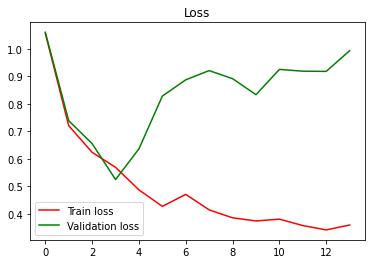

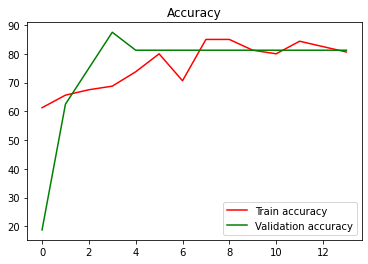



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 55.0000% , Train loss is: 0.9459 , Validataion accuracy is: 62.5000% , Validataion loss is: 0.8346
Validation accuracy improved (-inf --> 62.5).
saving the model.
Epoch [2/40] , Train accuracy is: 65.6250% , Train loss is: 0.7129 , Validataion accuracy is: 56.2500% , Validataion loss is: 1.1340
EarlyStopping counter: 1 out of 10
Epoch [3/40] , Train accuracy is: 67.5000% , Train loss is: 0.6469 , Validataion accuracy is: 62.5000% , Validataion loss is: 1.0585
Validation accuracy improved (62.5 --> 62.5).
saving the model.
Epoch [4/40] , Train accuracy is: 78.7500% , Train loss is: 0.5310 , Validataion accuracy is: 56.2500% , Validataion loss is: 0.9284
EarlyStopping counter: 1 out of 10
Epoch [5/40] , Train accuracy is: 76.2500% , Train loss is: 0.5091 , Validataion accuracy is: 62.5000% , Validataion loss is: 0.8893
Validat

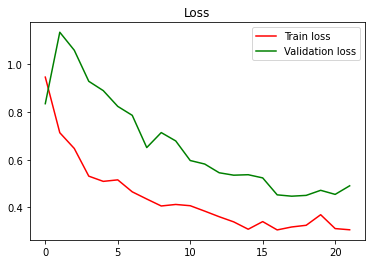

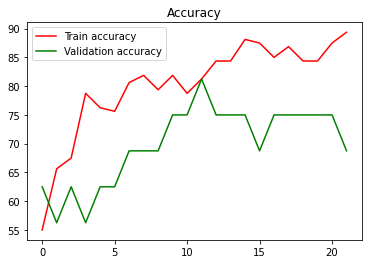



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 66.8750% , Train loss is: 0.9842 , Validataion accuracy is: 50.0000% , Validataion loss is: 0.6486
Validation accuracy improved (-inf --> 50.0).
saving the model.
Epoch [2/40] , Train accuracy is: 79.3750% , Train loss is: 0.6257 , Validataion accuracy is: 62.5000% , Validataion loss is: 0.7194
Validation accuracy improved (50.0 --> 62.5).
saving the model.
Epoch [3/40] , Train accuracy is: 76.8750% , Train loss is: 0.5230 , Validataion accuracy is: 68.7500% , Validataion loss is: 0.7373
Validation accuracy improved (62.5 --> 68.75).
saving the model.
Epoch [4/40] , Train accuracy is: 84.3750% , Train loss is: 0.4287 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.6026
Validation accuracy improved (68.75 --> 75.0).
saving the model.
Epoch [5/40] , Train accuracy is: 81.2500% , Train loss is: 0.4231 , Validataion

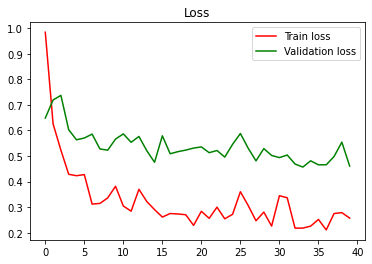

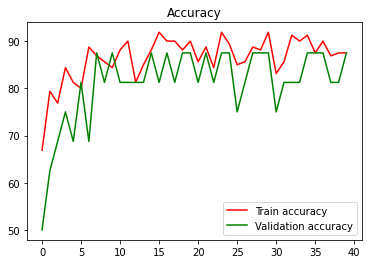



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 57.5000% , Train loss is: 0.9234 , Validataion accuracy is: 62.5000% , Validataion loss is: 1.2442
Validation accuracy improved (-inf --> 62.5).
saving the model.
Epoch [2/40] , Train accuracy is: 64.3750% , Train loss is: 0.7863 , Validataion accuracy is: 68.7500% , Validataion loss is: 0.8327
Validation accuracy improved (62.5 --> 68.75).
saving the model.
Epoch [3/40] , Train accuracy is: 73.1250% , Train loss is: 0.7362 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.6007
Validation accuracy improved (68.75 --> 75.0).
saving the model.
Epoch [4/40] , Train accuracy is: 76.2500% , Train loss is: 0.5601 , Validataion accuracy is: 56.2500% , Validataion loss is: 0.6932
EarlyStopping counter: 1 out of 10
Epoch [5/40] , Train accuracy is: 75.0000% , Train loss is: 0.5407 , Validataion accuracy is: 75.0000% , Vali

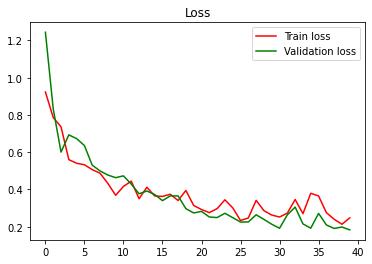

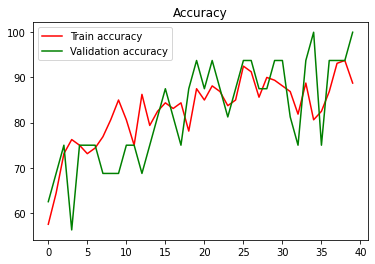



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 53.7500% , Train loss is: 1.6396 , Validataion accuracy is: 68.7500% , Validataion loss is: 1.0247
Validation accuracy improved (-inf --> 68.75).
saving the model.
Epoch [2/40] , Train accuracy is: 47.5000% , Train loss is: 1.3618 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.8589
Validation accuracy improved (68.75 --> 75.0).
saving the model.
Epoch [3/40] , Train accuracy is: 63.7500% , Train loss is: 1.0359 , Validataion accuracy is: 81.2500% , Validataion loss is: 0.6642
Validation accuracy improved (75.0 --> 81.25).
saving the model.
Epoch [4/40] , Train accuracy is: 70.6250% , Train loss is: 0.7311 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.4681
EarlyStopping counter: 1 out of 10
Epoch [5/40] , Train accuracy is: 70.6250% , Train loss is: 0.6435 , Validataion accuracy is: 81.2500% , Val

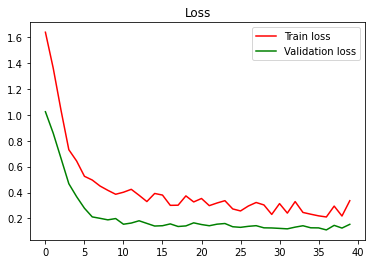

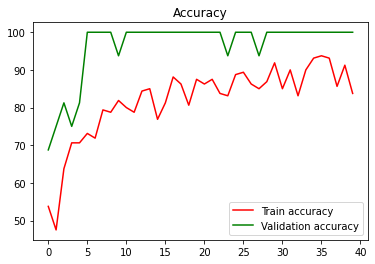



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 36.2500% , Train loss is: 2.6538 , Validataion accuracy is: 37.5000% , Validataion loss is: 1.7413
Validation accuracy improved (-inf --> 37.5).
saving the model.
Epoch [2/40] , Train accuracy is: 56.2500% , Train loss is: 1.1728 , Validataion accuracy is: 50.0000% , Validataion loss is: 0.9308
Validation accuracy improved (37.5 --> 50.0).
saving the model.
Epoch [3/40] , Train accuracy is: 61.2500% , Train loss is: 0.9443 , Validataion accuracy is: 68.7500% , Validataion loss is: 0.7122
Validation accuracy improved (50.0 --> 68.75).
saving the model.
Epoch [4/40] , Train accuracy is: 63.1250% , Train loss is: 0.8182 , Validataion accuracy is: 68.7500% , Validataion loss is: 0.8600
Validation accuracy improved (68.75 --> 68.75).
saving the model.
Epoch [5/40] , Train accuracy is: 73.1250% , Train loss is: 0.6803 , Validataio

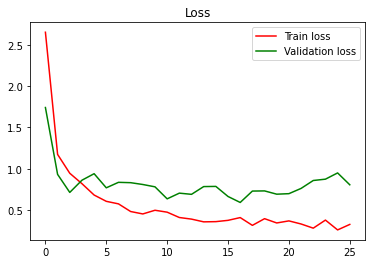

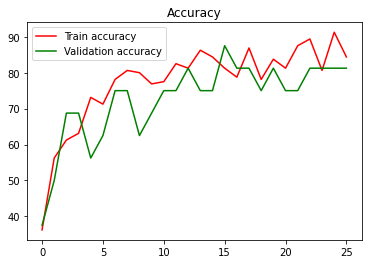



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 49.3750% , Train loss is: 1.3007 , Validataion accuracy is: 25.0000% , Validataion loss is: 1.0713
Validation accuracy improved (-inf --> 25.0).
saving the model.
Epoch [2/40] , Train accuracy is: 61.8750% , Train loss is: 0.8812 , Validataion accuracy is: 43.7500% , Validataion loss is: 0.8856
Validation accuracy improved (25.0 --> 43.75).
saving the model.
Epoch [3/40] , Train accuracy is: 61.8750% , Train loss is: 0.7844 , Validataion accuracy is: 56.2500% , Validataion loss is: 0.8276
Validation accuracy improved (43.75 --> 56.25).
saving the model.
Epoch [4/40] , Train accuracy is: 67.5000% , Train loss is: 0.6426 , Validataion accuracy is: 62.5000% , Validataion loss is: 1.0097
Validation accuracy improved (56.25 --> 62.5).
saving the model.
Epoch [5/40] , Train accuracy is: 70.0000% , Train loss is: 0.5680 , Validatai

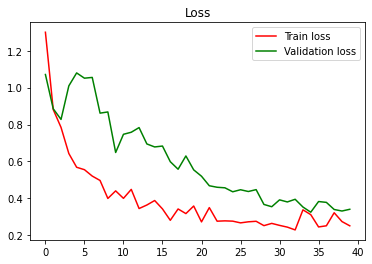

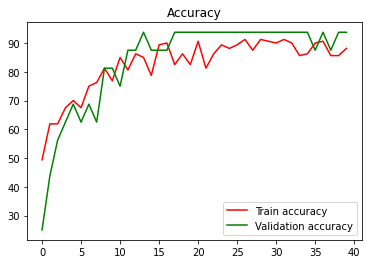



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 42.5000% , Train loss is: 2.6995 , Validataion accuracy is: 50.0000% , Validataion loss is: 0.7258
Validation accuracy improved (-inf --> 50.0).
saving the model.
Epoch [2/40] , Train accuracy is: 55.0000% , Train loss is: 1.4127 , Validataion accuracy is: 50.0000% , Validataion loss is: 0.8481
Validation accuracy improved (50.0 --> 50.0).
saving the model.
Epoch [3/40] , Train accuracy is: 56.2500% , Train loss is: 0.9874 , Validataion accuracy is: 75.0000% , Validataion loss is: 0.5551
Validation accuracy improved (50.0 --> 75.0).
saving the model.
Epoch [4/40] , Train accuracy is: 58.7500% , Train loss is: 0.7305 , Validataion accuracy is: 68.7500% , Validataion loss is: 0.5228
EarlyStopping counter: 1 out of 10
Epoch [5/40] , Train accuracy is: 73.1250% , Train loss is: 0.5430 , Validataion accuracy is: 68.7500% , Valida

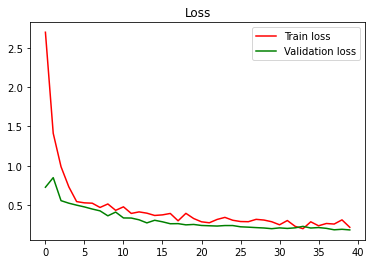

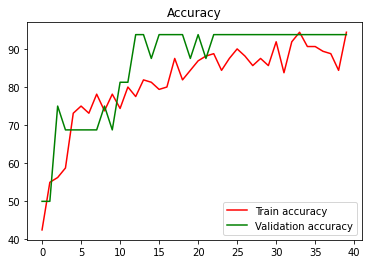



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 64.3750% , Train loss is: 0.8246 , Validataion accuracy is: 64.7059% , Validataion loss is: 0.7701
Validation accuracy improved (-inf --> 64.70588235294117).
saving the model.
Epoch [2/40] , Train accuracy is: 69.3750% , Train loss is: 0.6225 , Validataion accuracy is: 35.2941% , Validataion loss is: 1.6859
EarlyStopping counter: 1 out of 10
Epoch [3/40] , Train accuracy is: 71.2500% , Train loss is: 0.5377 , Validataion accuracy is: 64.7059% , Validataion loss is: 1.1207
Validation accuracy improved (64.70588235294117 --> 64.70588235294117).
saving the model.
Epoch [4/40] , Train accuracy is: 78.1250% , Train loss is: 0.4706 , Validataion accuracy is: 76.4706% , Validataion loss is: 0.4251
Validation accuracy improved (64.70588235294117 --> 76.47058823529412).
saving the model.
Epoch [5/40] , Train accuracy is: 76.8750% , T

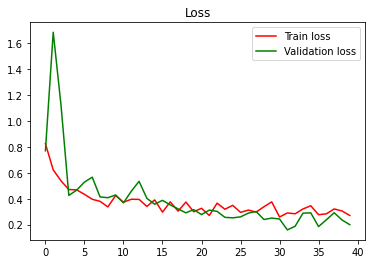

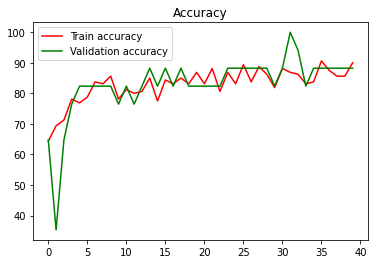



 EDGNN Model
Layer 1 : 7 4 64 <function relu at 0x7faa695aed08> True
Layer 2 : 64 4 64 <function relu at 0x7faa695aed08> True


Epoch [1/40] , Train accuracy is: 35.0000% , Train loss is: 2.2320 , Validataion accuracy is: 58.8235% , Validataion loss is: 0.6229
Validation accuracy improved (-inf --> 58.82352941176471).
saving the model.
Epoch [2/40] , Train accuracy is: 50.6250% , Train loss is: 1.0586 , Validataion accuracy is: 64.7059% , Validataion loss is: 0.5948
Validation accuracy improved (58.82352941176471 --> 64.70588235294117).
saving the model.
Epoch [3/40] , Train accuracy is: 55.0000% , Train loss is: 0.7878 , Validataion accuracy is: 52.9412% , Validataion loss is: 0.7194
EarlyStopping counter: 1 out of 10
Epoch [4/40] , Train accuracy is: 61.8750% , Train loss is: 0.6318 , Validataion accuracy is: 64.7059% , Validataion loss is: 0.7362
Validation accuracy improved (64.70588235294117 --> 64.70588235294117).
saving the model.
Epoch [5/40] , Train accuracy is: 73.7500% , T

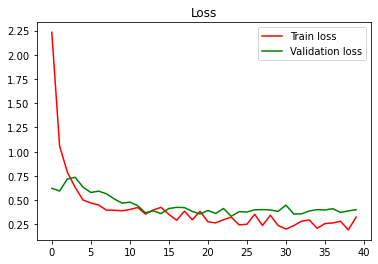

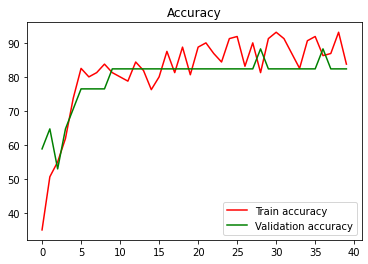

In [ ]:
es_g = EarlyStopping(patience=10)

num_samples = len(all_graphs)
num_folds = 10
accuracy_test_g = np.zeros(num_folds)
kf = KFold(n_splits=num_folds)
kf_2 = KFold(n_splits=num_folds, shuffle=True)


for k, (train_index, test_index) in enumerate(kf.split(all_graphs)):
    loss_val_g = []
    accuracy_val_g = []
    loss_train_g = []
    accuracy_train_g = []
    


    model_g = GNNModel_GraphCL(graph=all_graphs,
                        parameters_gcl=parameters_gcl,
                        graph_num_classes = graph_num_classes,
                        graph_num_rels = graph_num_rels,
                        graph_num_entities = graph_num_entities)
    
    model_g.to(device)
    optimizer_graphcl = torch.optim.Adam(model_g.parameters(),
                             lr=learning_rate_graphcl,
                             weight_decay=weight_decay_graphcl)

    # test set with labels
    test_g = [all_graphs[i] for i in test_index]
    test_labels = graph_labels[test_index]
    # Batch a collection of DGLGraph s into one graph for more efficient graph computation
    test_batch = dgl.batch(test_g)


    train_valid_g = [all_graphs[i] for i in train_index]
    train_valid_labels = graph_labels[train_index]

    # split to train and validation set with their labels
    for train_i, valid_i in kf_2.split(train_index):
      train_g = [train_valid_g[i] for i in train_i]
      train_labels = train_valid_labels[train_i]

      valid_g = [train_valid_g[i] for i in valid_i]
      valid_labels = train_valid_labels[valid_i]


    # Batch a collection of DGLGraph s into one graph for more efficient graph computation
    valid_batch = dgl.batch(valid_g)

    train_map_sampler = list(map(list, zip(train_g, train_labels)))
    # Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.
    train_batch = DataLoader(train_map_sampler,
                                  batch_size=batch_size_graphcl,
                                  shuffle=True,
                                  collate_fn=collate)



    for epoch_number in range(epoch_graphcl):
        model_g.train()
        loss_train = []
        accuracy_train = []
        for iter, (local_batch, local_label) in enumerate(train_batch):
            logits = model_g(local_batch.to(device))
            loss = loss_fcn_graphcl(logits, local_label.to(device))
            loss_train.append(loss.item())
            _, indices = torch.max(logits, dim=1)
            correct = torch.sum(indices == local_label)
            accuracy_train.append(correct.item() * 100.0 / len(local_label))
            
            optimizer_graphcl.zero_grad()
            loss.backward()
            optimizer_graphcl.step()


        validation_accuracy_g, validation_loss_g = evaluate_GraphCL(valid_labels.to(device), valid_batch.to(device))
        validation_accuracy_percent_g = validation_accuracy_g * 100

        # The training loss would be the average, over the K-folds, of the loss on the Trainset.
        print("Epoch [{}/{}] , Train accuracy is: {:.4f}% , Train loss is: {:.4f} ," 
              " Validataion accuracy is: {:.4f}% , Validataion loss is: {:.4f}".format(
                  epoch_number+1,epoch_graphcl,
                  np.mean(accuracy_train),
                  np.mean(loss_train),
                  validation_accuracy_percent_g,
                  validation_loss_g))
        
        # if the model improved, test it over test batch
        if es_g(validation_accuracy_percent_g, model_g, 'pytorch_model.bin'):
            test_acc, _ = evaluate_GraphCL(test_labels, test_batch)
            accuracy_test_g[k] = test_acc*100


        # for plot
        accuracy_train_g.append(np.mean(accuracy_train))
        loss_train_g.append(np.mean(loss_train))
        loss_val_g.append(validation_loss_g)
        accuracy_val_g.append(validation_accuracy_percent_g)


        if es_g.early_stop:
            print("Early Stopping!!")             
            break
    es_g.reset()
    plot_k(model, loss_train_g, loss_val_g, accuracy_train_g, accuracy_val_g)
        

###  Graph Classification Final Test Accuracy

In [ ]:
# load trained model
# this time only to see better the network

model_g.load_state_dict(torch.load(f"pytorch_model.bin"))
model_g.eval()

GNNModel_GraphCL(
  (layers): ModuleList(
    (0): edgnn_MessagePassing_Model(
      (batch): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (linear): Linear(in_features=18, out_features=64, bias=True)
    )
    (1): edgnn_MessagePassing_Model(
      (batch): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (linear): Linear(in_features=132, out_features=64, bias=True)
    )
  )
  (readout): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
# The test accuracy would be the average, over the K-folds = 10
test_accuracy_mean_g = np.mean(accuracy_test_g)
print('Test Accuracies over {} fold is: \n {} \n'.format(num_folds, accuracy_test_g))
print('Test Accuracy is: {} %'.format(test_accuracy_mean_g))

Test Accuracies over 10 fold is: 
 [73.68421053 73.68421053 78.94736842 89.47368421 84.21052632 89.47368421
 94.73684211 84.21052632 94.44444444 66.66666667] 

Test Accuracy is: 82.953216374269 %


# Part 4 - Experimental evaluation


As we can see in Part 3, the re-implementation of the paper named *EDGNN: A SIMPLE AND POWERFUL GNN FOR DIRECTED LABELED GRAPHS* is working perfectly.

<br/>

In this approach, similar to the paper, after downloading the MUTAG dataset and creating *Node and Edge Features*, and *Heterogeneous Graphs*, I've built  *Message Passing paradigm* with message function, reduce function, and update function of the nodes and edges.
Then I've defined GNN models for both Node Classification and Graph Classification separately.

In the end, I've trained the Graph Neural Network for each graph learning tasks. (Node and Graph Classification).

<br/>

The plots with labels and titles have shown in Part 3 through running the code as well!

<br/>

The result for both Node Classification and Graph Classification task on the MUTAG dataset that the paper have reported is:

* for Node Classification:
  * edGNN (avg) : 80.0
  * edGNN (max) : 85.3

* for Graph Classification:
  * edGNN (avg) : 86.9
  * edGNN (max) : 88.8

<br/>

The pre-trained model of my re-implementation performed well in these tasks as well.

The result of my re-implementation for both the Node Classification and Graph Classification task on the MUTAG dataset is near to the paper reported results.

* Test Accuracy for Node Classification: 72.05882352941177 %

* Test Accuracy for Graph Classification: 82.953216374269 %


<br/>

---